In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from experimental_designs import (
    CompletelyRandomizedBlockDesign, 
    CRBDWithMissingValue, 
    BalancedIncompleteBlockDesign,
    BlockedDesignWithSubsampling
    )

In [2]:
os.getcwd()

'C:\\Users\\SEBASTIAN\\Google Drive\\Mi unidad\\RSTUDIO_\\Diseño_Experimentos\\T2\\Diseño_En_Bloques'

## 🧪 Contexto del experimento: Producción de cebada y fuentes de nitrógeno

### 🎯 Necesidad de investigación

El objetivo de este estudio es evaluar el efecto de distintas **fuentes de nitrógeno** sobre la **producción de cebada**. Dado que el nitrógeno es un nutriente esencial en los cultivos, se desea identificar cuál de las seis fuentes probadas genera un mayor rendimiento. Sin embargo, se reconoce que el **tipo de suelo** puede influir en los resultados, por lo que debe ser considerado como un factor de bloqueo.

### 🧮 Diseño del experimento

- **Tratamientos:** 6 fuentes distintas de nitrógeno (`T1` a `T6`).
- **Bloques:** 4 tipos de suelo (`S1` a `S4`).
- **Variable de respuesta:** Producción de cebada en kilogramos por parcela.
  - Es una variable cuantitativa continua que representa el rendimiento agrícola.
- **Diseño:** Diseño en Bloques Completos Aleatorizados (DBCA), donde todos los tratamientos se prueban en todos los bloques.

### ⚖️ Justificación del diseño

Se utiliza un DBCA porque:
- El tipo de suelo introduce variabilidad en la producción.
- Al bloquear por tipo de suelo, se elimina esta fuente de variación no controlada.
- Todos los tratamientos son aplicados en cada tipo de suelo (bloques completos), permitiendo una comparación más precisa de los efectos de los tratamientos.

In [3]:
data = pd.read_csv("../Conjuntos_Datos/ejemplo_dbca.csv")

In [4]:
data

,Suelo,Tratamiento,Produccion
0,S1,T1,15
1,S1,T2,22
2,S1,T3,36
3,S1,T4,40
4,S1,T5,44
5,S1,T6,41
6,S2,T1,18
7,S2,T2,26
8,S2,T3,41
9,S2,T4,45


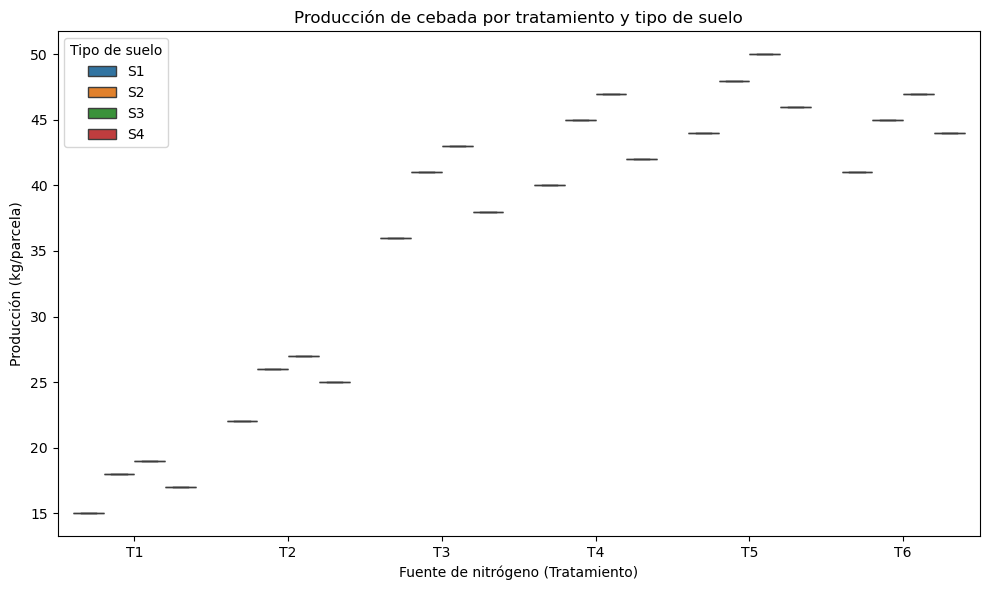

In [5]:
# Crear gráfico de caja para visualizar la producción por tratamiento y suelo
plt.figure(figsize=(10, 6))
sns.boxplot(x="Tratamiento", y="Produccion", hue="Suelo", data=data)
plt.title("Producción de cebada por tratamiento y tipo de suelo")
plt.xlabel("Fuente de nitrógeno (Tratamiento)")
plt.ylabel("Producción (kg/parcela)")
plt.legend(title="Tipo de suelo")
plt.tight_layout()
plt.show()

🔍 Interpretación sugerida:

+ Se observa variabilidad en la producción según el tratamiento.
+ Algunos suelos parecen producir sistemáticamente más que otros.
+ El tratamiento T5, por ejemplo, tiende a mostrar altos niveles de producción en todos los suelos.
+ Este tipo de visualización es ideal para justificar la inclusión del factor bloque (suelo) en el modelo.

In [6]:
crbd = CompletelyRandomizedBlockDesign(data)
print(crbd.perform_anova())

                     sum_sq    df         F        PR(>F)
C(Suelo)         112.833333   3.0    84.625  1.255668e-09
C(Tratamiento)  2920.333333   5.0  1314.150  2.942845e-19
Residual           6.666667  15.0       NaN           NaN


## 🧪 Ejemplo 2 – Diseño en Bloques Completos Aleatorizados con una Observación Faltante

### 🎯 Necesidad de investigación

En la práctica, los experimentos pueden enfrentar pérdidas de datos debido a errores, fallos técnicos o eventos externos. Este ejemplo trata sobre cómo abordar una observación faltante en un Diseño en Bloques Completos Aleatorizados (DBCA), estimarla correctamente y proceder con el análisis sin comprometer la validez del diseño.

### 🧪 Diseño del experimento

- **Tratamientos:** T1, T2 y T3
- **Bloques:** B1, B2, B3, B4
- **Observaciones:** Se registran valores para cada combinación Tratamiento–Bloque.
- **Observación faltante:** Tratamiento T3 en el bloque B3.

### 📏 Variable de respuesta

- **Nombre:** `Respuesta`
- **Descripción:** Variable continua que mide el efecto del tratamiento. Puede representar producción, concentración, tiempo, etc.

### 🧮 Estimación del valor faltante

Para conservar la estructura balanceada del diseño, se estima el valor faltante con la fórmula:


$$
\hat{Y}_{ij} = \bar{Y}_{i \cdot} + \bar{Y}_{\cdot j} - \bar{Y}_{\cdot \cdot}
$$


Donde:
- $\bar{Y}_{i\cdot} $ es el promedio del bloque i,
- $\bar{Y}_{\cdot j} $ es el promedio del tratamiento j,
- $\bar{Y}_{\cdot\cdot} $ es el promedio general de los datos disponibles.

Esta técnica asegura que la estimación respete el balance del diseño y permite continuar con el análisis como si el dato no hubiera faltado.

In [7]:
data2 = pd.read_csv("../Conjuntos_Datos/ejemplo_dbca_faltante.csv")

In [8]:
data2

,Bloque,Tratamiento,Respuesta
0,B1,T1,10.0
1,B1,T2,12.0
2,B1,T3,15.0
3,B2,T1,11.0
4,B2,T2,13.0
5,B2,T3,16.0
6,B3,T1,9.0
7,B3,T2,14.0
8,B3,T3,NaN
9,B4,T1,12.0


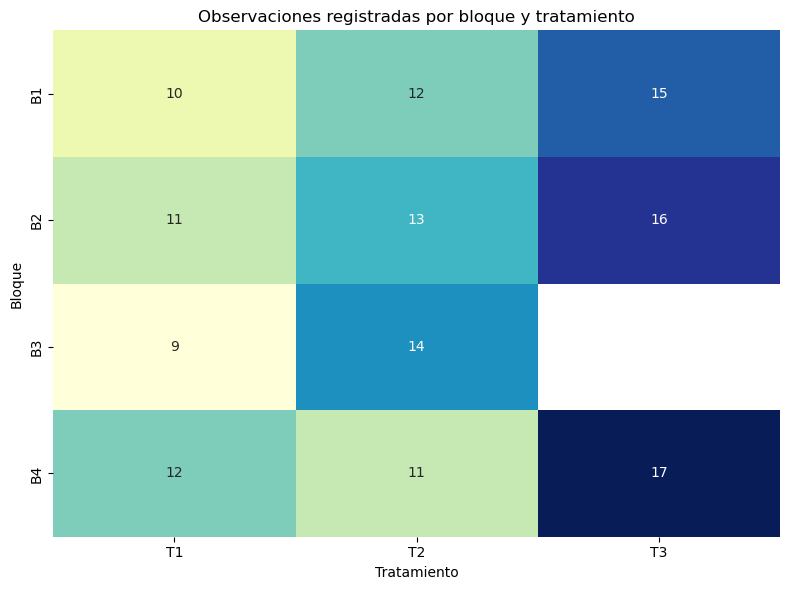

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data2.pivot(index="Bloque", columns="Tratamiento", values="Respuesta"),
    annot=True, cmap="YlGnBu", cbar=False
)
plt.title("Observaciones registradas por bloque y tratamiento")
plt.xlabel("Tratamiento")
plt.ylabel("Bloque")
plt.tight_layout()
plt.show()

In [10]:
crbd_mv = CRBDWithMissingValue(data2)
print("Estimated missing value:", crbd_mv.estimate_missing_value())
print(crbd_mv.fill_and_analyze())

Estimated missing value: 14.772727272727273
                   sum_sq   df          F    PR(>F)
C(Bloque)        2.376550  3.0   0.442021  0.731536
C(Tratamiento)  54.887397  2.0  15.312998  0.004396
Residual        10.753099  6.0        NaN       NaN


## 🧪 Ejemplo 3 – Diseño en Bloques Incompletos Balanceados (BIBD)

### 🎯 Necesidad de investigación

Este experimento busca comparar el desempeño de distintos catalizadores en un proceso químico, midiendo el **tiempo de reacción**. Sin embargo, no todos los tratamientos pueden aplicarse en todos los bloques debido a restricciones logísticas. Esto motiva el uso de un **Diseño en Bloques Incompletos Balanceados (BIBD)**.

### ⚙️ Diseño experimental

- **Tratamientos:** 4 catalizadores distintos.
- **Bloques:** 4 lotes de materia prima.
- **Observaciones:** Cada lote contiene una submuestra de tratamientos.
- **Diseño:** Bloques incompletos, pero balanceados, lo que permite hacer inferencias válidas.

### 📏 Variable de respuesta

- **Nombre:** `Tiempo`
- **Descripción:** Tiempo de reacción del proceso químico, en segundos u otra unidad adecuada.
- Es una variable cuantitativa continua.

### 📐 Justificación del diseño

- Permite controlar la variabilidad debida a los lotes, sin requerir la evaluación completa de todos los tratamientos en cada bloque.
- Asegura balance en la cantidad de veces que aparece cada tratamiento.
- Permite una comparación justa entre tratamientos bajo limitaciones prácticas.


In [11]:
data3 = pd.read_csv("../Conjuntos_Datos/ejemplo_dbib.csv")

In [12]:
data3

,Catalizador,Lote,Tiempo
0,1,1,73.0
1,1,2,74.0
2,1,3,NaN
3,1,4,71.0
4,2,1,NaN
5,2,2,75.0
6,2,3,67.0
7,2,4,72.0
8,3,1,73.0
9,3,2,75.0


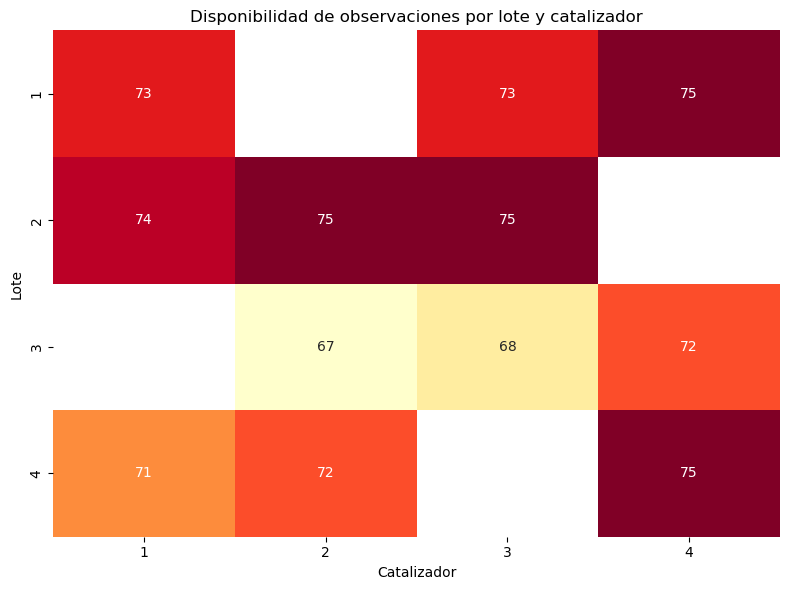

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data3.pivot(index="Lote", columns="Catalizador", values="Tiempo"),
    annot=True, cmap="YlOrRd", cbar=False
)
plt.title("Disponibilidad de observaciones por lote y catalizador")
plt.xlabel("Catalizador")
plt.ylabel("Lote")
plt.tight_layout()
plt.show()

🔍 Interpretación del gráfico
+ Cada celda representa un valor observado de tiempo de reacción para una combinación de lote (bloque) y catalizador (tratamiento).
+ Las celdas vacías indican combinaciones no observadas —característico de un BIBD, donde no todos los tratamientos se prueban en todos los bloques.
+ Aun con esta incompletitud, el diseño está balanceado: todos los tratamientos aparecen el mismo número de veces y en diferentes bloques, permitiendo comparaciones válidas.

In [15]:
bibd = BalancedIncompleteBlockDesign(data3)
print(bibd.perform_anova())

                   sum_sq   df          F    PR(>F)
C(Catalizador)  22.750000  3.0  11.666667  0.010739
C(Lote)         66.083333  3.0  33.888889  0.000953
Residual         3.250000  5.0        NaN       NaN


## 🧪 Ejemplo 4 – Diseño en Bloques Completos con Submuestreo (Balanceado y sin Confounding)

### 🎯 Necesidad de investigación

Este experimento busca evaluar el efecto de diferentes **fuentes de nitrógeno** sobre la **absorción de nitrógeno por plantas**, medida en distintos momentos del tiempo. Para mejorar la precisión de las estimaciones, se toman **dos submuestras por combinación** de tratamiento y bloque.

A diferencia de versiones anteriores, este diseño está correctamente **balanceado**: todos los tratamientos aparecen en todos los bloques, y se evita el confounding entre efectos principales.

### ⚙️ Diseño experimental

- **Tratamientos:** 3 tipos de nitrógeno (`N1`, `N2`, `N3`)
- **Bloques:** 3 tiempos (`TIEMPO = 0`, `1`, `2`)
- **Submuestras por celda:** 2
- **Total de observaciones:** 18 (3 tratamientos × 3 bloques × 2 submuestras)
- **Diseño:** Bloques completamente aleatorizados con submuestreo (balanceado)

### 📏 Variable de respuesta

- **Nombre:** `CANTIDAD`
- **Descripción:** Cantidad de nitrógeno absorbido, medida continua.

### 📐 Modelo estadístico

$
y_{ijk} = \mu + \tau_i + \beta_j + \epsilon_{ij} + \eta_{ijk}
$

- $ \tau_i $: efecto del tratamiento
- $ \beta_j $: efecto del bloque
- $ \epsilon_{ij} $: variación entre unidades experimentales
- $ \eta_{ijk} $: variación entre submuestras

Este modelo permite estimar los efectos principales y descomponer la varianza en niveles observacional y experimental.



$ y_{ijk} = \mu + \tau_i + \beta_j + \epsilon_{ij} + \eta_{ijk} $

$y_{ijk}$

In [16]:
data4 = pd.read_csv("../Conjuntos_Datos/ejemplo_submuestreo.csv")

In [17]:
data4

,TIEMPO,NITROGENO,CANTIDAD
0,0,N1,18
1,0,N1,20
2,0,N2,25
3,0,N2,26
4,0,N3,22
5,0,N3,21
6,1,N1,24
7,1,N1,27
8,1,N2,26
9,1,N2,30


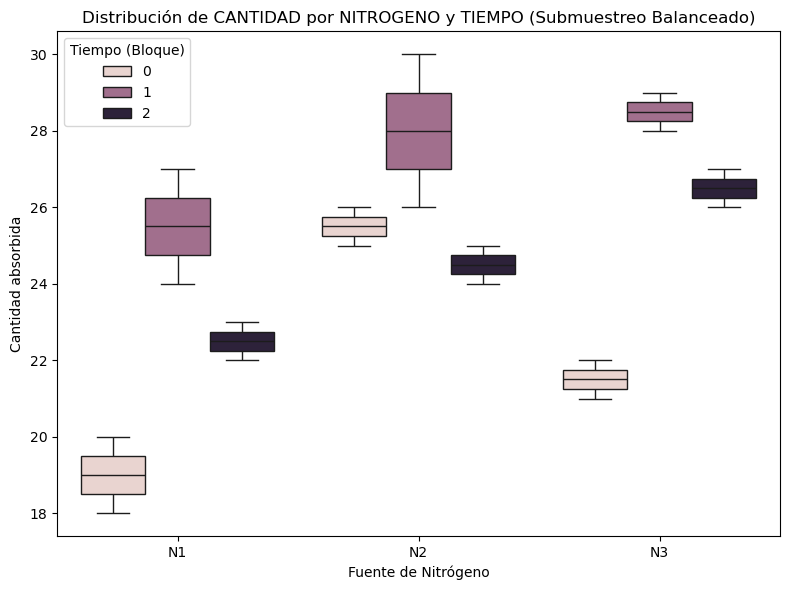

In [18]:
# Crear gráfico para visualizar todas las combinaciones tratamiento-bloque con submuestras
plt.figure(figsize=(8, 6))
sns.boxplot(x="NITROGENO", y="CANTIDAD", hue="TIEMPO", data=data4)
plt.title("Distribución de CANTIDAD por NITROGENO y TIEMPO (Submuestreo Balanceado)")
plt.xlabel("Fuente de Nitrógeno")
plt.ylabel("Cantidad absorbida")
plt.legend(title="Tiempo (Bloque)")
plt.tight_layout()
plt.show()

In [5]:
# Renombrar columnas para ajustarse a la clase
bdws = BlockedDesignWithSubsampling(
    data=data4,
    block_col="TIEMPO",
    treatment_col="NITROGENO",
    response_col="CANTIDAD"
)

# Ejecutar el ANOVA anidado
anova_result = bdws.perform_nested_anova()

# Mostrar resultados
print(anova_result)

                           sum_sq   df          F    PR(>F)
C(TIEMPO)               85.444444  2.0  21.971429  0.000344
C(NITROGENO)            47.444444  2.0  12.200000  0.002737
C(NITROGENO):C(TIEMPO)  21.888889  4.0   2.814286  0.090917
Residual                17.500000  9.0        NaN       NaN
